<a href="https://colab.research.google.com/github/prateekpandeyscholar/AI_MAD_NumGame/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ridge Regression Demonstration

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dummy data
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=10, noise=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ridge model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)))


Coefficients: [42.25346608 92.70836256 18.7108323  10.5662399  66.02171203 57.2971965
 45.9012348  68.02827268 78.8410707  77.73663307]
Test MSE: 97.49900966858583


Same data with Simple Linear Regression wihtouut Ridge

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("OLS Coefficients:", lr.coef_)
print("OLS Test MSE:", mean_squared_error(y_test, lr.predict(X_test)))


OLS Coefficients: [42.64673027 94.45727403 19.12240995 11.12804288 67.02654356 58.10929738
 46.61812873 68.48982803 79.88512579 78.45702994]
OLS Test MSE: 104.07317178613505


Plots showing how alpha affects coefficients

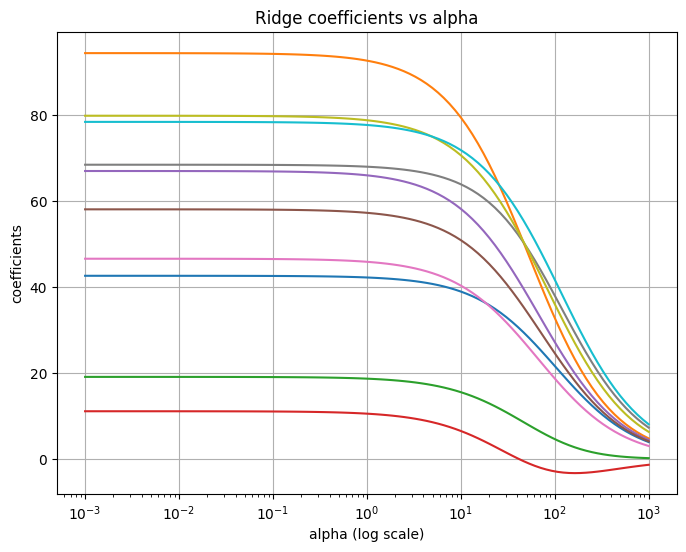

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

alphas = np.logspace(-3, 3, 100)
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(8, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('coefficients')
plt.title('Ridge coefficients vs alpha')
plt.grid(True)
plt.show()


The value of lambda(alpha) must be decided on the basis of MSE values of the model during training phase on some random lambda values. Whichever gives minimum MSE will be the final lambda that will be taken into account for training and testing.

Alpha: 0.01, CV MSE: 3131.98
Alpha: 0.1, CV MSE: 3125.19
Alpha: 1, CV MSE: 3639.40
Alpha: 10, CV MSE: 5303.70
Alpha: 100, CV MSE: 6025.02
Alpha: 1000, CV MSE: 6121.53

Best alpha: 0.1
Test MSE with best alpha: 2856.49


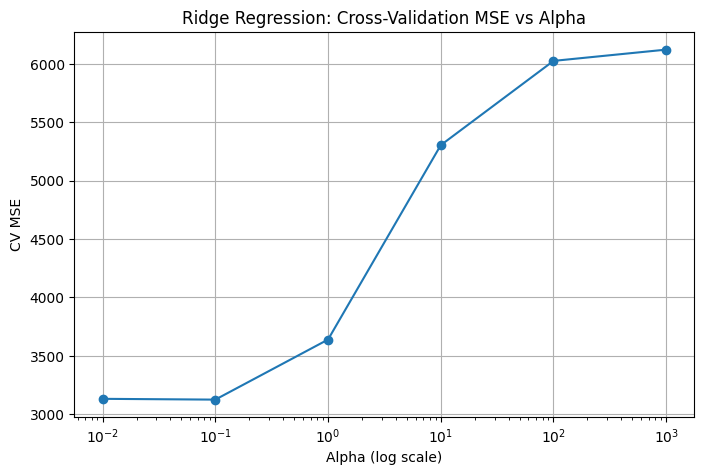

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Step 1: Load dataset
X, y = load_diabetes(return_X_y=True)

# Step 2: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: List of alpha values (regularization strengths)
alphas = [0.01, 0.1, 1, 10, 100, 1000]
cv_errors = []

# Step 4: Perform cross-validation for each alpha
for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_mse = -np.mean(scores)
    cv_errors.append(avg_mse)
    print(f"Alpha: {alpha}, CV MSE: {avg_mse:.2f}")

# Step 5: Select best alpha
best_alpha = alphas[np.argmin(cv_errors)]
print(f"\nBest alpha: {best_alpha}")

# Step 6: Train final model
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

# Step 7: Predict on test set and evaluate
y_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE with best alpha: {test_mse:.2f}")

# Step 8: Plot MSE vs alpha
plt.figure(figsize=(8, 5))
plt.semilogx(alphas, cv_errors, marker='o')
plt.xlabel('Alpha (log scale)')
plt.ylabel('CV MSE')
plt.title('Ridge Regression: Cross-Validation MSE vs Alpha')
plt.grid(True)
plt.show()
